In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from xgboost import XGBClassifier


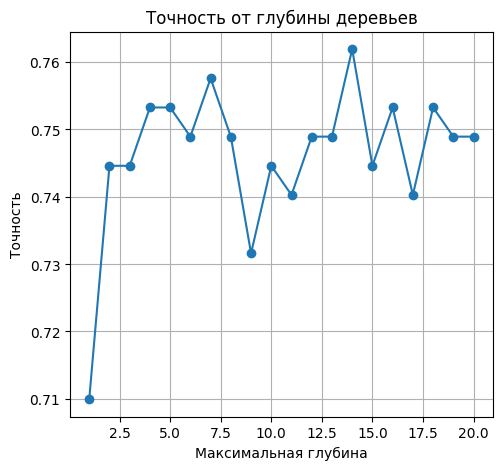

In [2]:
# Загрузка данных
data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Исследование зависимости качества от глубины деревьев
max_depths = range(1, 21)
accuracy_depth = []
time_depth = []

for depth in max_depths:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_depth.append(accuracy_score(y_test, y_pred))
    time_depth.append(time.time() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(max_depths, accuracy_depth, marker='o')
plt.title('Точность от глубины деревьев')
plt.xlabel('Максимальная глубина')
plt.ylabel('Точность')
plt.grid()

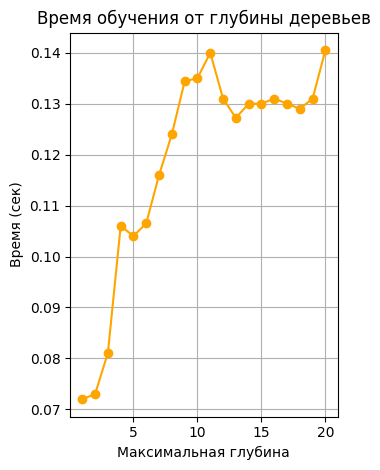

In [4]:
plt.subplot(1, 2, 2)
plt.plot(max_depths, time_depth, marker='o', color='orange')
plt.title('Время обучения от глубины деревьев')
plt.xlabel('Максимальная глубина')
plt.ylabel('Время (сек)')
plt.grid()
plt.tight_layout()
plt.show()

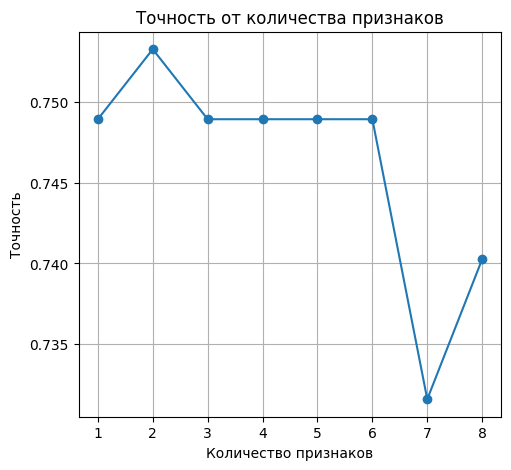

In [5]:
# Исследование зависимости качества от количества признаков
max_features = range(1, X.shape[1]+1)
accuracy_features = []
time_features = []

for features in max_features:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=100, max_features=features, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_features.append(accuracy_score(y_test, y_pred))
    time_features.append(time.time() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(max_features, accuracy_features, marker='o')
plt.title('Точность от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('Точность')
plt.grid()


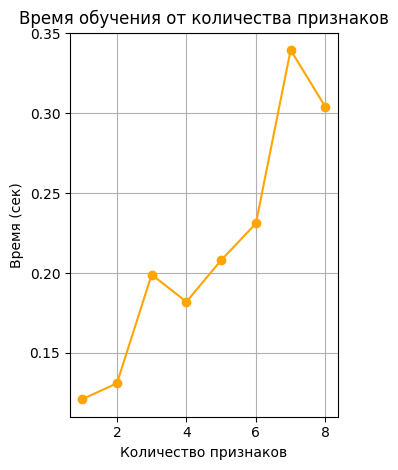

In [6]:
plt.subplot(1, 2, 2)
plt.plot(max_features, time_features, marker='o', color='orange')
plt.title('Время обучения от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('Время (сек)')
plt.grid()
plt.tight_layout()
plt.show()

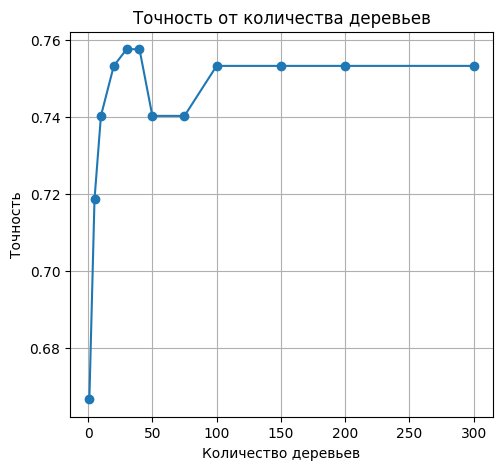

In [7]:
# Исследование зависимости качества от количества деревьев
n_estimators = [1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200, 300]
accuracy_estimators = []
time_estimators = []

for estimators in n_estimators:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_estimators.append(accuracy_score(y_test, y_pred))
    time_estimators.append(time.time() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators, accuracy_estimators, marker='o')
plt.title('Точность от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.grid()

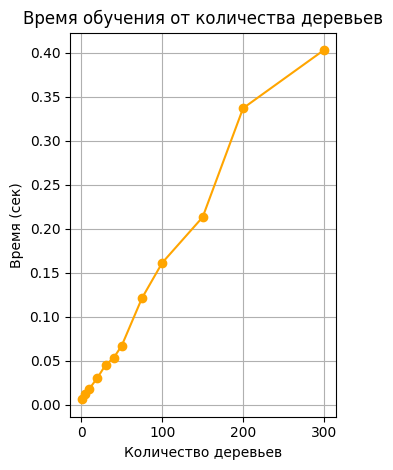

In [8]:
plt.subplot(1, 2, 2)
plt.plot(n_estimators, time_estimators, marker='o', color='orange')
plt.title('Время обучения от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Время (сек)')
plt.grid()
plt.tight_layout()
plt.show()